# Data Inspection

In [1]:
import nltk
import gensim
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from nltk.corpus import stopwords


df = pd.read_csv("data/data.csv", sep=";")

X = df["title"].values.reshape(-1, 1)
Y = df["label"].values.reshape(-1, 1)

print("We are going to use only the titles from the database")
print("[o] X.shape =", X.shape)
print("[o] Y.shape =", Y.shape)

We are going to use only the titles from the database
[o] X.shape = (6334, 1)
[o] Y.shape = (6334, 1)


In [2]:
print("Some examples from both classes (1 = fake, 0 = real news):\n")
fcounter_max, ncounter_max = 5, 5
fcounter, ncounter = 0, 0

for x, y in zip(X[:5], Y[:5]):
    label = int(y[0])
    label_s = "FAKE" if label==1 else "REAL"
    print(f"[o] [{label_s}] {x[0].strip()}")

Some examples from both classes (1 = fake, 0 = real news):

[o] [FAKE] You Can Smell Hillary’s Fear
[o] [FAKE] Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)
[o] [REAL] Kerry to go to Paris in gesture of sympathy
[o] [FAKE] Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'
[o] [REAL] The Battle of New York: Why This Primary Matters


In [3]:
max_size = max([len(x[0]) for x in X])
min_size = min([len(x[0]) for x in X])
print("[o] The longest sentence is", max_size, "character long")
print("[o] The shortest sentence is", min_size, "character long")

[o] The longest sentence is 289 character long
[o] The shortest sentence is 1 character long


In [4]:
nreal, nfake = 0, 0

for y in Y:
    if int(y[0]) == 1:
        nfake += 1
    else:
        nreal += 1

print("[o] There are", nfake, "FAKE news titles")
print("[o] There are", nreal, "REAL news titles")

[o] There are 3163 FAKE news titles
[o] There are 3171 REAL news titles


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/martinkondor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[o] Word Cloud for FAKE news:


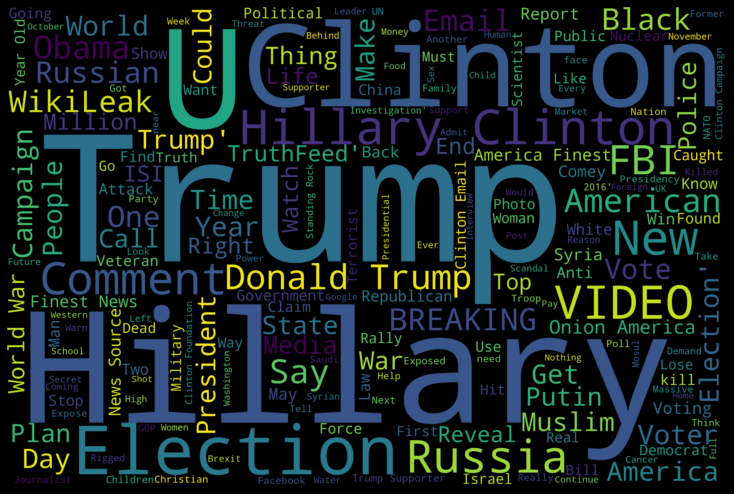

In [5]:
nltk.download('stopwords')
stopwords_set = list(set(stopwords.words('english')))
wordcloud_text = ""

for x, y in zip(X, Y):
    if int(y[0]) == 1:
        wordcloud_text += f" {x}"


print("[o] Word Cloud for FAKE news:")

wordcloud = WordCloud(width=3000, height=2000, background_color='black', stopwords=stopwords_set).generate(wordcloud_text)
fig = plt.figure(figsize=(10, 30), facecolor='k', edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

[o] Word Cloud for REAL news:


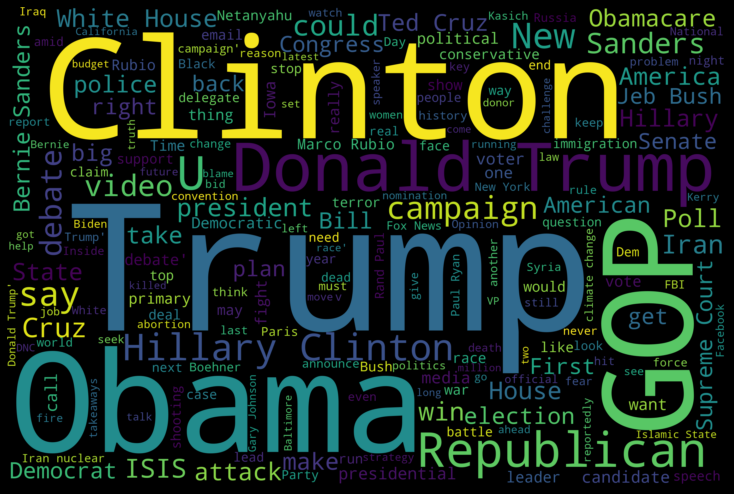

In [6]:
wordcloud_text = ""

for x, y in zip(X, Y):
    if int(y[0]) == 0:
        wordcloud_text += f" {x}"


print("[o] Word Cloud for REAL news:")

wordcloud = WordCloud(width=3000, height=2000, background_color='black', stopwords=stopwords_set).generate(wordcloud_text)
fig = plt.figure(figsize=(10, 30), facecolor='k', edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del wordcloud_text

In [7]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokenized_X = []


def clean_str(x):
    return x.strip().lower()


for x in X:
    tokens = tokenizer.tokenize(clean_str(x[0]))
    filtered_tokens = [w.strip() for w in tokens if (w not in stopwords_set) and len(w) > 1]
    tokenized_X.append(tokens)
    

print("[o] Examples for tokenized text:")
for sentence in tokenized_X[:2] + tokenized_X[-2:]:
    print(sentence)

[o] Examples for tokenized text:
['you', 'can', 'smell', 'hillary', 's', 'fear']
['watch', 'the', 'exact', 'moment', 'paul', 'ryan', 'committed', 'political', 'suicide', 'at', 'a', 'trump', 'rally', 'video']
['in', 'ethiopia', 'obama', 'seeks', 'progress', 'on', 'peace', 'security', 'in', 'east', 'africa']
['jeb', 'bush', 'is', 'suddenly', 'attacking', 'trump', 'here', 's', 'why', 'that', 'matters']


In [8]:
w2v_model = gensim.models.Word2Vec(sentences=tokenized_X, window=5, min_count=1, vector_size=100)

searched_word = "plan"
print(f"[o] Search for similar words \"{searched_word}\":")
for w in w2v_model.wv.most_similar(searched_word)[:5]:
    print(w)

[o] Search for similar words "plan":
('over', 0.9997091889381409)
('and', 0.9997084736824036)
('up', 0.9996917843818665)
('a', 0.9996883869171143)
('for', 0.9996871948242188)


In [9]:
searched_word = "people"
print(f"[o] Search for similar words \"{searched_word}\":")
for w in w2v_model.wv.most_similar(searched_word)[:5]:
    print(w)

[o] Search for similar words "people":
('after', 0.999813437461853)
('in', 0.999806821346283)
('and', 0.9998016953468323)
('from', 0.9997943043708801)
('a', 0.9997829794883728)
